### Overall Price Distribution

In [1]:
import pandas as pd

df = pd.read_csv("grape_data_cleaned.csv")

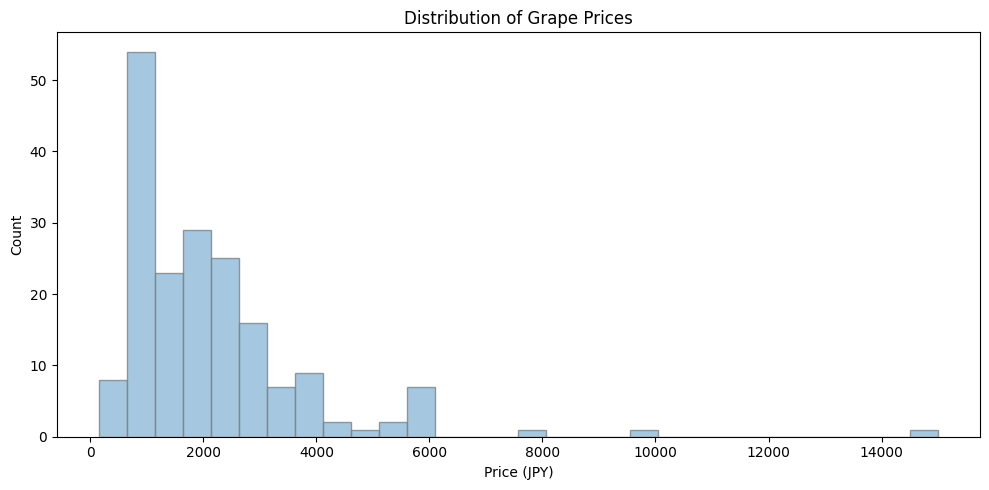

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.hist(
    df["price_yen_with_tax"],
    bins=30,
    color="#8FBBD9",
    edgecolor="gray",
    alpha=0.8
)

plt.xlabel("Price (JPY)")
plt.ylabel("Count")
plt.title("Distribution of Grape Prices")

plt.tight_layout()
plt.show()

Prices exhibit a right-skewed distribution,
with a small number of high-priced products.

### Price Distribution by Variety System

In [5]:
GREEN = "#4CAF50"
PURPLE = "#8E44AD"

green_list = [
    'Queen Seven', 'Haneou', 'Queen Rouge', 'Shine Muscat',
    'Fujinokagayaki', 'Seto Giants', 'Shigyoku', 'Shinku', 'Kaiji',
    'Queen Roug', 'Scarlet', 'Red Shine Muscat', 'Suiho',
    'Sunshine Red', 'Ving', 'Wasekaiji', 'Pizzutello Bianco',
    'Nouvelle Rose', 'Muscat Noir', 'Miwahime'
]

In [6]:
df["group"] = df["grape_variety"].apply(
    lambda x: "Green Group" if x in green_list else "Purple Group"
)

In [8]:
group_avg = (
    df.groupby("group")["price_yen_with_tax"]
      .mean()
      .reset_index()
      .sort_values("price_yen_with_tax", ascending=False)
)

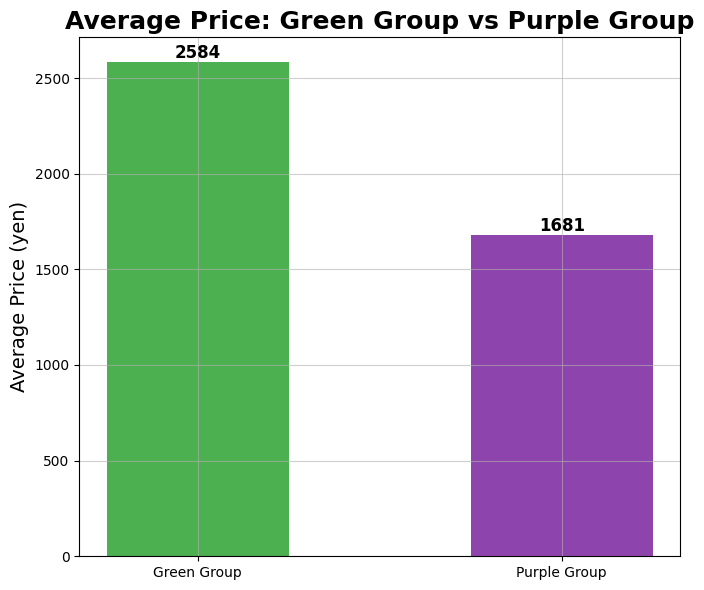

In [9]:
color_map = {
    "Green Group": GREEN,
    "Purple Group": PURPLE
}

plt.figure(figsize=(7,6))

bars = plt.bar(
    group_avg["group"],
    group_avg["price_yen_with_tax"],
    color=[color_map[g] for g in group_avg["group"]],
    width=0.5
)

for p in bars:
    height = p.get_height()
    plt.annotate(
        f"{height:.0f}",
        (p.get_x() + p.get_width()/2., height),
        ha="center", va="bottom",
        fontsize=12,
        fontweight="bold"
    )

plt.title("Average Price: Green Group vs Purple Group", fontsize=18, fontweight="bold")
plt.ylabel("Average Price (yen)", fontsize=14)

plt.gca().grid(True, alpha=0.6)

plt.tight_layout()
plt.show()

Shine Muscat-type grapes tend to show higher median prices,
though substantial overlap exists between the two systems.

### Grain Diameter vs Price

In [10]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df["grain_diameter_mm"],
        y=df["price_yen_with_tax"],
        mode="markers",
        marker=dict(
            color=df["group"].map(color_map),
            size=10,
            line=dict(width=1, color="black"),
            opacity=0.8
        ),
        text=df["grape_variety"],
        hovertemplate=(
            "<b>%{text}</b><br>"
            "Grain Diameter: %{x} mm<br>"
            "Price: %{y} JPY<extra></extra>"
        )
    )
)

fig.update_layout(
    title="Grain Diameter vs Price",
    xaxis_title="Grain Diameter (mm)",
    yaxis_title="Price (JPY)",
    template="simple_white",
    width=800,
    height=500
)

fig.show()

Larger grain sizes are generally associated with higher prices,
suggesting a positive relationship between appearance and price.

### Bunch Length vs Price

In [15]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df["bunch_length_cm"],
        y=df["price_yen_with_tax"],
        mode="markers",
        marker=dict(
            color=df["group"].map(color_map),
            size=10,
            line=dict(width=1, color="black"),
            opacity=0.8
        ),
        text=df["grape_variety"],
        hovertemplate=(
            "<b>%{text}</b><br>"
            "Grain Diameter: %{x} mm<br>"
            "Price: %{y} JPY<extra></extra>"
        )
    )
)

fig.update_layout(
    title="Bunch Length vs Price",
    xaxis_title="Bunch Length (cm)",
    yaxis_title="Price (JPY)",
    template="simple_white",
    width=800,
    height=500
)

fig.show()

Longer bunches tend to appear in higher-priced products,
although variability remains high.


### Year Introduced vs Price

In [14]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df["year_introduced"],
        y=df["price_yen_with_tax"],
        mode="markers",
        marker=dict(
            color=df["group"].map(color_map),
            size=10,
            line=dict(width=1, color="black"),
            opacity=0.8
        ),
        text=df["grape_variety"],
        hovertemplate=(
            "<b>%{text}</b><br>"
            "Grain Diameter: %{x} mm<br>"
            "Price: %{y} JPY<extra></extra>"
        )
    )
)

fig.update_layout(
    title="Introduced Year vs Price",
    xaxis_title="Introduced Year",
    yaxis_title="Price (JPY)",
    template="simple_white",
    width=800,
    height=500
)

fig.show()

Recently introduced varieties often occupy higher price ranges,
though introduction year alone does not determine price.